In [29]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from scipy.interpolate import RegularGridInterpolator
import random
import pandas as pd

Right now this is an old version. Newer code is being updated which will eventually this main file

In [30]:
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import z_at_value
from astropy import constants as const
from astropy import units as u

In [31]:
import Merger_rate_plot as mr
import interpolate as inter

In [32]:
plt.style.use(['science']) 
import os
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'

In [33]:
#df = pd.read_csv("data/Triple-mass-redshift.csv")
df_triples = pd.read_csv("data/Triple-mass-redshift.csv",index_col=False)
df_triples.head()

,M1,M2,M3,qin,qout,t_triple,z_triple,M1_ID,M2_ID,M3_ID,sep_2_ovtks
0,3.742097e+07,1.534732e+07,8.204738e+06,0.410126,0.155486,1.985633e+09,3.257459,9.223372e+18,9.223372e+18,9.223372e+18,0.010944
1,2.287451e+08,8.452986e+07,4.211761e+07,0.369537,0.134443,5.529691e+09,1.101818,9.223372e+18,9.223372e+18,3.402509e+18,10.310674
2,4.649029e+07,2.608377e+07,4.653945e+07,0.561058,0.641268,3.025313e+09,2.201414,9.223372e+18,9.223372e+18,9.223372e+18,37.473365
3,1.828782e+07,5.582083e+06,2.216544e+06,0.305235,0.092859,1.972738e+09,3.276165,9.223372e+18,9.223372e+18,9.223372e+18,1.230178
4,4.082678e+08,4.687125e+07,1.002870e+06,0.114805,0.002203,4.814316e+09,1.320180,9.223372e+18,9.223372e+18,9.223372e+18,11.221503


In [34]:
df_binary = pd.read_csv("Data/binary-merger-data.csv",index_col= False)
df_binary.head()

,M1,M2,t_merger,Merger,Redshift,Type,BH1-ID,BH2-ID
0,2.261179e+06,1.629006e+06,8.587741e+08,Yes,6.459185,iso,9223372036326575607,9223372036365264250
1,1.614773e+06,1.077349e+06,8.934006e+08,Yes,6.265176,iso,9223372036330308081,9223372036383756962
2,6.554858e+06,1.175723e+06,4.120229e+09,Yes,1.587945,iso,9223372036306477048,9223372036351439102
3,7.039616e+06,6.263608e+06,8.933714e+10,No,0.000000,iso,9223372036312285311,9223372036346956171
4,1.179139e+07,3.306548e+06,1.421714e+10,No,0.000000,iso,9223372036300488336,9223372036365264250


In [35]:
M1_ill = df_triples["M1"].to_numpy()
qin_ill = df_triples["qin"].to_numpy()
qout_ill = df_triples["qout"].to_numpy()

triple_merger_time = df_triples["t_triple"].to_numpy()
z_triples = df_triples["z_triple"].to_numpy()
N_triple = len(M1_ill)

In [36]:
M1_mass = df_triples["M1"]
M2_mass = df_triples["M1"]*df_triples["qin"]
M3_mass = df_triples["qout"] * (M1_mass + M2_mass)

Text(0.5, 0, '$\\log(M_{total})$')

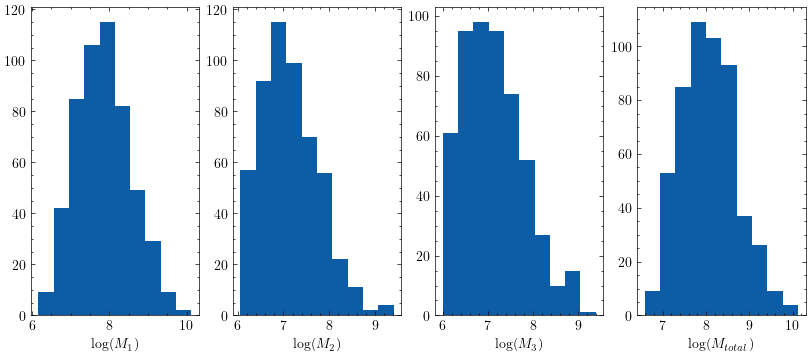

In [38]:
fig,ax = plt.subplots(1,4,figsize=(10,4))
ax[0].hist(np.log10(M1_mass))
ax[0].set_xlabel("$\log(M_1)$")
ax[1].hist(np.log10(M2_mass))
ax[1].set_xlabel("$\log(M_2)$")
ax[2].hist(np.log10(M3_mass))
ax[2].set_xlabel("$\log(M_3)$")
ax[3].hist(np.log10(M1_mass+M2_mass+M3_mass))
ax[3].set_xlabel("$\log(M_{total})$")

Text(0.5, 0, '$\\log[q_{out}]$')

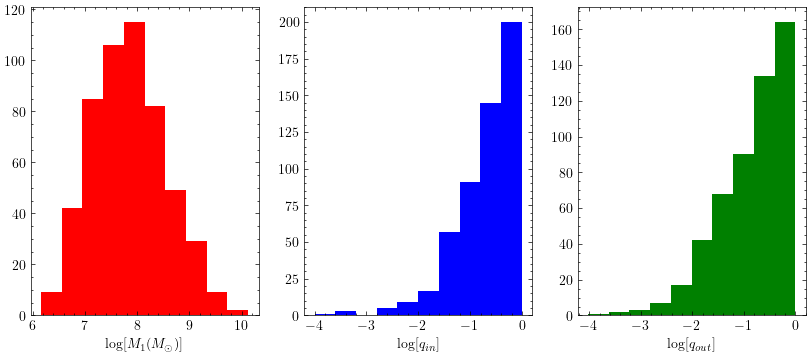

In [39]:
fig,ax = plt.subplots(1,3,figsize=(10,4))
ax[0].hist(np.log10(df_triples["M1"]),color="red")
ax[0].set_xlabel("$\log[M_1 (M_{\odot})]$")
ax[1].hist(np.log10(df_triples["qin"]),color="blue")
ax[1].set_xlabel("$\log[q_{in}]$")
ax[2].hist(np.log10(df_triples["qout"]),color="green")
ax[2].set_xlabel("$\log[q_{out}]$")

In [40]:
df = pd.read_csv("data/Triple-mass-redshift.csv",index_col=False)

In [41]:
df_run=[]
Nruns = 100

for i in range(Nruns):
    
    #print(df.head())
    prompt_merger=0
    ejection_then_merger=0
    no_merger=0
    merger_flags = []

    M1_ill = df["M1"].to_numpy()
    qin_ill = df["qin"].to_numpy()
    qout_ill = df["qout"].to_numpy()
    z_triple_ill = df["z_triple"].to_numpy()

    for j in range(N_triple):

        P = random.uniform(0,1)
        a_P = inter.interp_result(M1_ill[j],qin_ill[j],qout_ill[j],"a")*0.01
        b_P = inter.interp_result(M1_ill[j],qin_ill[j],qout_ill[j],"b")*0.01
        c_P = inter.interp_result(M1_ill[j],qin_ill[j],qout_ill[j],"c")*0.01
        d_P = inter.interp_result(M1_ill[j],qin_ill[j],qout_ill[j],"d")*0.01

        if(P < a_P+b_P+c_P):

            prompt_merger = prompt_merger + 1
            
            if(P <= a_P):
                merger_flags.append("Tr-12")
            
            elif(P > a_P and P <= a_P+b_P):
                merger_flags.append("Tr-13")
                    
            elif(P > a_P+b_P and P <= a_P+b_P+c_P):
                merger_flags.append("Tr-23")
                    
        elif(P > a_P+b_P+c_P and P <= a_P+b_P+c_P+d_P):
            
            #merger after ejection
            merger_flags.append("Tr-ej")
            ejection_then_merger = ejection_then_merger + 1

        elif(P > a_P + b_P + c_P + d_P):
            
            no_merger = no_merger + 1
            merger_flags.append("No")

    column_name = ['M1','qin','qout','z_triple','flag']
    df_i = pd.DataFrame({'M1': M1_ill,'qin': qin_ill, 'qout': qout_ill,'z_triple' : z_triple_ill,'flag':merger_flags},columns=column_name)
    
    df_run.append(df_i)

In [22]:
Outcome_data_file_name = "Data/Triple_outcomes_N_"+str(Nruns)+".csv"
df_pd = pd.concat(df_run)
df_pd.to_csv(Outcome_data_file_name,index = False)

In [23]:
prompt_percent = []
meger_eject_percent = []
eject_percent = []

for i in range(50):
    p1 = len(df_run[0][df_run[0]["flag"]=="No"])/531 * 100
    p2 = len(df_run[0][df_run[0]["flag"]=="Tr-ej"])/531 * 100
    eject_percent.append(p1)
    meger_eject_percent.append(p2)
    prompt_percent.append(100-(p1+p2))


In [26]:
print("Prompt mergers: %f"%(np.mean(prompt_percent)))
print("Mergers after ejection : %f"%(np.mean(meger_eject_percent)))
print("No mergers: %f"%(np.mean(eject_percent)))

Prompt mergers: 21.092279
Mergers after ejection : 6.403013
No mergers: 72.504708


In [27]:
Trip_data = pd.read_csv(Outcome_data_file_name)
Trip_data  = Trip_data[:531]

In [28]:
Trip_data

,M1,qin,qout,z_triple,flag
0,3.742097e+07,0.410126,0.155486,3.257459,No
1,2.287451e+08,0.369537,0.134443,1.101818,No
2,4.649029e+07,0.561058,0.641268,2.201414,No
3,1.828782e+07,0.305235,0.092859,3.276165,No
4,4.082678e+08,0.114805,0.002203,1.320180,No
...,...,...,...,...,...
526,4.601341e+07,0.207269,0.961101,0.015170,No
527,5.320026e+07,0.044178,0.961101,0.002293,No
528,3.742097e+07,0.410126,0.155486,3.257459,No
529,2.287451e+08,0.369537,0.134443,1.101818,No


(array([ 14.,  50., 110., 107., 114.,  71.,  37.,  18.,   8.,   2.]),
 array([ 6.14679628,  6.54452571,  6.94225513,  7.33998456,  7.73771399,
         8.13544342,  8.53317285,  8.93090228,  9.32863171,  9.72636113,
        10.12409056]),
 <BarContainer object of 10 artists>)

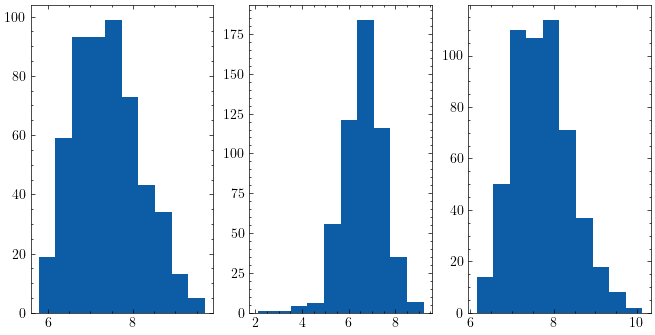

In [24]:
fig,ax = plt.subplots(1,3,figsize=(8,4))
ax[0].hist(np.log10(Trip_data["M1"]))
ax[1].hist(np.log10(Trip_data["M1"]*(Trip_data["qin"])))
ax[2].hist(np.log10(Trip_data["qout"] * (Trip_data["M1"]) + Trip_data["M1"]*Trip_data["qin"]))

In [25]:
df_12 = df_run[1][df_run[1]["flag"]=="Tr-12"]

Text(0.5, 0, '$\\log(M_3)$')

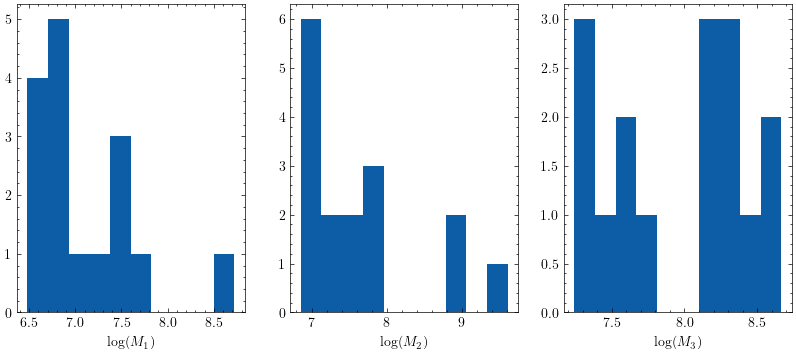

In [332]:
fig,ax = plt.subplots(1,3,figsize=(10,4))
ax[0].hist(np.log10(df_12["M1"]))
ax[0].set_xlabel("$\log(M_1)$")
ax[1].hist(np.log10(df_12["M1"]/df_12["qin"]))
ax[1].set_xlabel("$\log(M_2)$")
ax[2].hist(np.log10(df_12["qout"] * (df_12["M1"] + df_12["M1"]*df_12["qin"])))
ax[2].set_xlabel("$\log(M_3)$")


In [333]:
len(df_run[0][df_run[0]["flag"]=="Tr-12"])

138

In [334]:
df_run[0]["flag"]=="Tr-12"

0      False
1      False
2      False
3      False
4       True
       ...  
526     True
527     True
528     True
529    False
530    False
Name: flag, Length: 531, dtype: bool

In [335]:
df_run[0][df_run[0]["flag"]=="Tr-12"]["M1"]

4      8.962945e+05
12     3.035946e+06
13     3.070787e+06
14     2.259434e+06
17     2.389644e+08
           ...     
520    2.932589e+06
521    1.710329e+06
526    5.823320e+07
527    1.542926e+06
528    4.274809e+06
Name: M1, Length: 138, dtype: float64

In [368]:
def parameter_binning(df,param_key,parameter_args):

    binsize = parameter_args[0]
    param_min = parameter_args[1]
    param_max = parameter_args[2]
    param_num = int((param_max-param_min)/binsize)

    p_Tr = df[(df["flag"]=="Tr-12") | (df["flag"]=="Tr-13") | (df["flag"]=="Tr-23")][param_key]
    p_Tr_ej = df[df["flag"]=="Tr-ej"][param_key]
    p_Tr_no = df[df["flag"]=="No"][param_key]

    p_Tr_count,p_Tr_bin_edges = np.histogram(np.log10(p_Tr),range=(param_min,param_max),bins=param_num)
    p_Tr_bins = p_Tr_bin_edges[:-1]+0.5*binsize

    p_Tr_ej_count,p_Tr_ej_bin_edges = np.histogram(np.log10(p_Tr_ej),range=(param_min,param_max),bins=param_num)
    p_Tr_ej_bins = p_Tr_ej_bin_edges[:-1]+0.5*binsize

    p_Tr_no_count,p_Tr_no_bin_edges = np.histogram(np.log10(p_Tr_no),range=(param_min,param_max),bins=param_num)
    p_Tr_no_bins = p_Tr_no_bin_edges[:-1]+0.5*binsize

    return [p_Tr_bins,p_Tr_count,p_Tr_ej_count,p_Tr_no_count]

In [369]:
M1_array = []
qin_array = []
qout_array = []

for i in range(Nruns):
    M1_array.append(parameter_binning(df_run[i],"M1",[0.6,5,11]))
    qin_array.append(parameter_binning(df_run[i],"qin",[0.4,-4,0.1]))
    qout_array.append(parameter_binning(df_run[i],"qout",[0.4,-4,2]))

M1_array = np.array(M1_array)
qin_array = np.array(qin_array)
qout_array = np.array(qout_array)

M1_bins = M1_array[0,0]
M1_mean = np.mean(M1_array[:,1],axis=0)
M1_sigma = np.std(M1_array[:,1],axis=0)

qin_bins = qin_array[0,0]
qin_mean = np.mean(qin_array[:,1],axis=0)
qin_sigma = np.std(qin_array[:,1],axis=0)


In [370]:
def plot_parameter(ax,index,param):

    colors = ["blue","red","green"]

    for i in range(3):
        ax[index,i].plot(param[0,0],np.mean(param[:,i+1],axis=0),color=colors[i])
        ax[index,i].fill_between(param[0,0],np.mean(param[:,i+1],axis=0)-np.std(param[:,i+1],axis=0),np.mean(param[:,i+1],axis=0)+np.std(param[:,i+1],axis=0),color=colors[i],alpha=0.3)

    return 0

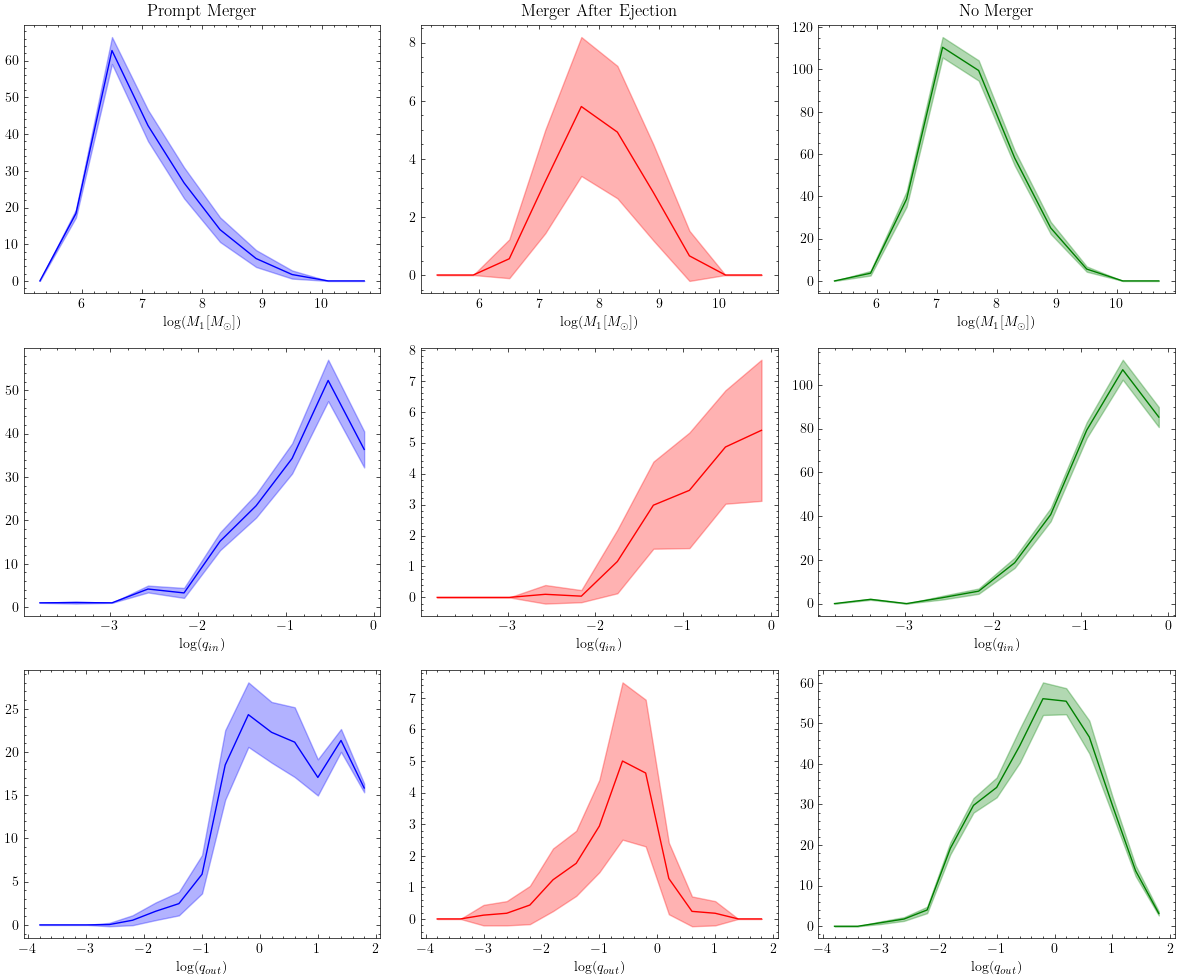

In [371]:
fig,ax = plt.subplots(3,3,figsize=(12,10))
plot_parameter(ax,0,M1_array)
plot_parameter(ax,1,qin_array)
plot_parameter(ax,2,qout_array)


ax[0,0].set_title("Prompt Merger")
ax[0,1].set_title("Merger After Ejection")
ax[0,2].set_title("No Merger")

for i in range(3):
    ax[0,i].set_xlabel("$\log(M_1[M_\odot])$")
    ax[1,i].set_xlabel("$\log(q_{in})$")
    ax[2,i].set_xlabel("$\log(q_{out})$")

fig.tight_layout()
plt.savefig("Figures/Triple-outcome-parameter-dist.pdf")


In [346]:
def masses_binning(df,parameter_args):


    binsize = parameter_args[0]
    param_min = parameter_args[1]
    param_max = parameter_args[2]
    param_num = int((param_max-param_min)/binsize)

    M1_12 = df[(df["flag"]=="Tr-12")]["M1"]
    M2_12 = df[(df["flag"]=="Tr-12")]["M1"] * df[(df["flag"]=="Tr-12")]["qin"]
    M3_12 = df[(df["flag"]=="Tr-12")]["qout"] * (M2_12 + M1_12)

    Ms_12 = [M1_12,M2_12,M3_12]
    M12_count_list = []

    for i in range(3):
        M12_count,M12_bin_Edges = np.histogram(np.log10(Ms_12[i]),range=(param_min,param_max),bins=param_num)
        M12_count_list.append(M12_count)
        M12_bins = M12_bin_Edges[:-1] + 0.5 *binsize

    M1_23 = df[(df["flag"]=="Tr-23")]["M1"]
    M2_23 = df[(df["flag"]=="Tr-23")]["M1"] * df[(df["flag"]=="Tr-23")]["qin"]
    M3_23 = df[(df["flag"]=="Tr-23")]["qout"] * (M2_23 + M1_23)

    Ms_23 = [M1_23,M2_23,M3_23]
    M23_count_list = []

    for i in range(3):
        M23_count,M23_bin_Edges = np.histogram(np.log10(Ms_23[i]),range=(param_min,param_max),bins=param_num)
        M23_count_list.append(M23_count)
        M23_bins = M23_bin_Edges[:-1] + 0.5 *binsize


    M1_13 = df[(df["flag"]=="Tr-13")]["M1"]
    M2_13 = df[(df["flag"]=="Tr-13")]["M1"] * df[(df["flag"]=="Tr-13")]["qin"]
    M3_13 = df[(df["flag"]=="Tr-13")]["qout"] * (M2_13 + M1_13)

    Ms_13 = [M1_13,M2_13,M3_13]
    M13_count_list = []

    for i in range(3):
        M13_count,M13_bin_Edges = np.histogram(np.log10(Ms_13[i]),range=(param_min,param_max),bins=param_num)
        M13_count_list.append(M13_count)
        M13_bins = M13_bin_Edges[:-1] + 0.5 *binsize
    
    # Ms_12 = np.array(Ms_12)
    # Ms_23 = np.array(Ms_23)
    # Ms_13 = np.array(Ms_13)

    return M13_bins,[M12_count_list,M23_count_list,M13_count_list]

In [347]:
Ms_runs = []

for i in range(Nruns):
    Ms_runs.append(masses_binning(df_run[i],[0.6,5,11])[1])

mbin = masses_binning(df_run[i],[0.6,5,11])[0]
Ms_runs = np.array(Ms_runs)


In [348]:
def plot_masses(ax,Tr_index):

    colors = ["darkorange","darkgreen","orchid"]
    labels = ["M1","M2","M3"]

    for i in range(3):
        ax[Tr_index].plot(mbin,np.mean(Ms_runs[:,Tr_index,i,:],axis=0),color = colors[i])
        ax[Tr_index].fill_between(mbin,np.mean(Ms_runs[:,Tr_index,i,:],axis=0)-np.std(Ms_runs[:,Tr_index,i,:],axis=0),np.mean(Ms_runs[:,Tr_index,i,:],axis=0)+np.std(Ms_runs[:,Tr_index,i,:],axis=0),alpha=0.2,color = colors[i],label=labels[i])
    

In [349]:
def plot_masses(ax,M_index):

    colors = ["darkorange","darkgreen","orchid"]
    labels = ["Tr-12","Tr-23","Tr-13"]

    for i in range(3):
        ax[M_index].plot(mbin,np.mean(Ms_runs[:,i,M_index,:],axis=0),color = colors[i])
        ax[M_index].fill_between(mbin,np.mean(Ms_runs[:,i,M_index,:],axis=0)-np.std(Ms_runs[:,i,M_index,:],axis=0),np.mean(Ms_runs[:,i,M_index,:],axis=0)+np.std(Ms_runs[:,i,M_index,:],axis=0),alpha=0.2,color = colors[i],label=labels[i])

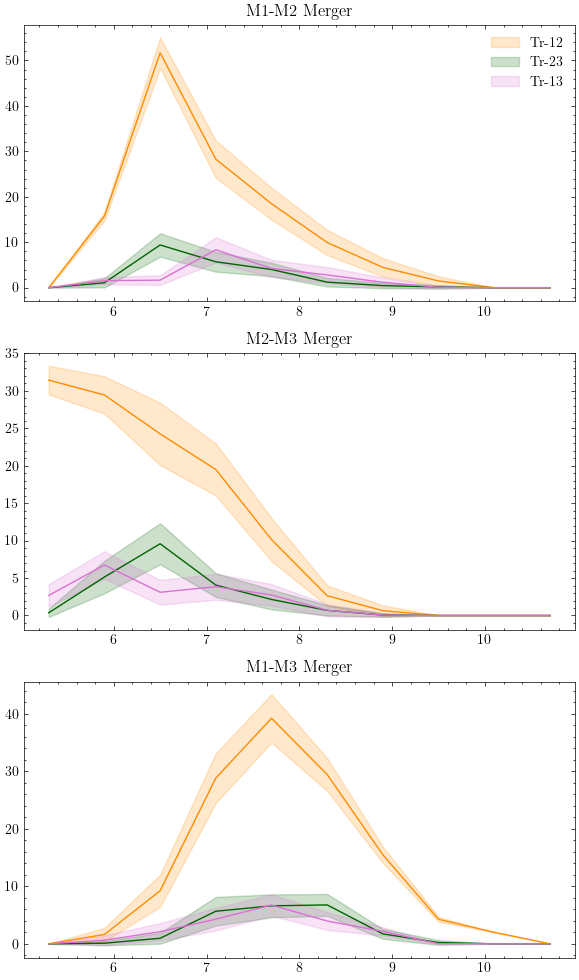

In [350]:
fig,ax = plt.subplots(3,1,figsize=(6,10))

plot_masses(ax,0)
ax[0].legend()
ax[0].set_title("M1-M2 Merger")
plot_masses(ax,1)
ax[1].set_title("M2-M3 Merger")
plot_masses(ax,2)
ax[2].set_title("M1-M3 Merger")
fig.tight_layout()

In [372]:
def merger_rate_per_run(df,zmax=4,zbinsize=0.01,lgzbinsize=0.2,lgzmin=-3.0,lgzmax=1.0):

    
    Tr_prompt = df[(df["flag"]=="Tr-12") | (df["flag"]=="Tr-13") | (df["flag"]=="Tr-23")]["z_triple"]
    Tr_prompt_mr,Tr_prompt_lgzbins,Tr_prompt_rate = mr.merger_rate_log_plot(Tr_prompt,zmax,zbinsize,lgzbinsize,lgzmin,lgzmax)


    Tr_ej_z = df[(df["flag"]=="Tr-ej")]["z_triple"]
    Tr_ej_mr,Tr_ej_lgzbins,Tr_ej_rate = mr.merger_rate_log_plot(Tr_ej_z,zmax,zbinsize,lgzbinsize,lgzmin,lgzmax) 

    return Tr_prompt_lgzbins,[Tr_prompt_mr,Tr_prompt_rate,Tr_ej_mr,Tr_ej_rate]

In [373]:

net_mr_Tr = []
net_mr_Tr_ej = []

mr_Tr = []
mr_Tr_ej = []

for i in range(Nruns):
    mr_out = merger_rate_per_run(df_run[i],4,0.01,0.2,-3.0,1.0)[1:][0]
    net_mr_Tr.append(mr_out[0])
    mr_Tr.append(mr_out[1])
    net_mr_Tr_ej.append(mr_out[2])
    mr_Tr_ej.append(mr_out[3])

mr_out
mr_Tr  = np.array(mr_Tr)
mr_Tr_ej = np.array(mr_Tr_ej)


In [374]:
np.mean(net_mr_Tr) + np.mean(net_mr_Tr_ej)

0.012850762536430376

In [375]:
lgzbins = merger_rate_per_run(df_run[i],4,0.01,0.2,-3.0,1.0)[0]

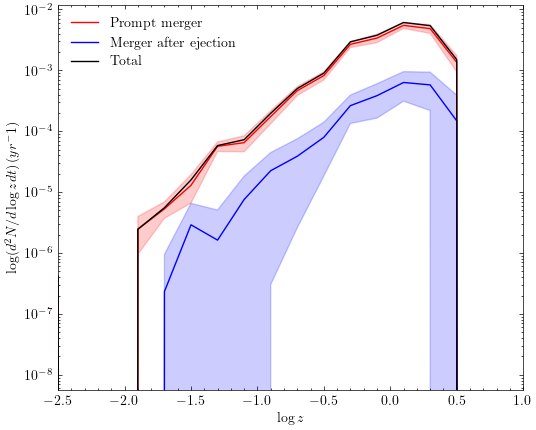

In [376]:
plt.figure(figsize=(6,5))

plt.plot(lgzbins,np.mean(mr_Tr,axis=0),color="red",label="Prompt merger")
plt.fill_between(lgzbins,np.mean(mr_Tr,axis=0)-np.std(mr_Tr,axis=0),np.mean(mr_Tr,axis=0)+np.std(mr_Tr,axis=0),color="red",alpha=0.2)

plt.plot(lgzbins,np.mean(mr_Tr_ej,axis=0),color="blue",label="Merger after ejection")
plt.fill_between(lgzbins,np.mean(mr_Tr_ej,axis=0)-np.std(mr_Tr_ej,axis=0),np.mean(mr_Tr_ej,axis=0)+np.std(mr_Tr_ej,axis=0),color="blue",alpha=0.2)

plt.plot(lgzbins,np.mean(mr_Tr,axis=0)+np.mean(mr_Tr_ej,axis=0),color="black",label="Total")

plt.xlim(-2.5,1)
plt.xlabel("$\log z$")
plt.ylabel("$\log (d^2 N / d \log z dt) \, (yr^-1)$")
plt.legend()
plt.yscale("log")
#plt.savefig("Figures/Merger-rate-Tr-Tr-ej.pdf")

In [377]:
binary_merger_z = df_binary[df_binary["Merger"] == "Yes"]["Redshift"]

binary_mr,lgzbins_bin,dNdlogzdt_bin = mr.merger_rate_log_plot(binary_merger_z,zmax=4,zbinsize=0.01,lgzbinsize=0.12,lgzmin=-3.0,lgzmax=1.0)

In [378]:
binary_mr

0.18646362568535974

In [379]:
np.mean(net_mr_Tr)

0.011526407983449212

In [380]:
np.mean(net_mr_Tr_ej)

0.0013243545529811635

In [381]:
(0.009244400184293277/0.18646362568535974) * 100

4.957749883021343

In [382]:
binary_mr + np.mean(net_mr_Tr) + np.mean(net_mr_Tr_ej)

0.1993143882217901

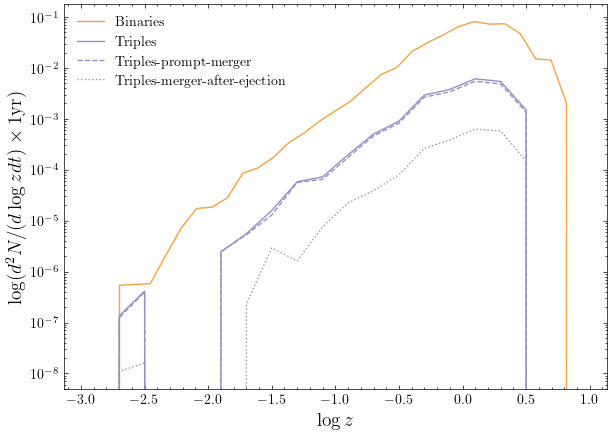

In [383]:
plt.figure(figsize=(7,5))
plt.plot(lgzbins_bin,dNdlogzdt_bin,color="#f1a340",label="Binaries")
plt.plot(lgzbins,np.mean(mr_Tr+mr_Tr_ej,axis=0),color="#998ec3",label="Triples")
plt.plot(lgzbins,np.mean(mr_Tr,axis=0),color="#998ec3",linestyle="--",label="Triples-prompt-merger")
plt.plot(lgzbins,np.mean(mr_Tr_ej,axis=0),color="#998ec3",linestyle=":",label="Triples-merger-after-ejection")
#plt.fill_between(lgzbins,np.mean(mr_Tr+mr_Tr_ej)-np.std(mr_Tr+mr_Tr_ej),np.mean(mr_Tr+mr_Tr_ej)+np.std(mr_Tr+mr_Tr_ej),color="black",alpha=0.25)
plt.yscale("log")
plt.xlabel("$\log z$",fontsize=14)
plt.ylabel(r"$\log (d^2 N / (d \log z dt)  \times 1\text{yr})$",fontsize=14)
plt.legend(fontsize=10)
plt.savefig("Figures/binary-vs-triples-merger-rate.pdf")

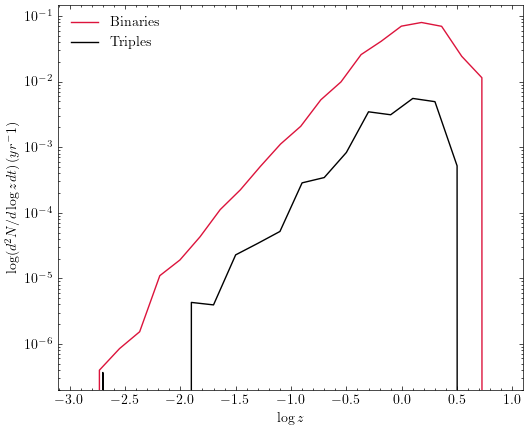

In [106]:
plt.figure(figsize=(6,5))
plt.plot(lgzbins_iso_bin,dNdlogzdt_iso_bin,color="crimson",label="Binaries")
plt.plot(lgzbins,np.mean(mr_Tr+mr_Tr_ej,axis=0),color="black",label="Triples")
#plt.fill_between(lgzbins,np.mean(mr_Tr+mr_Tr_ej)-np.std(mr_Tr+mr_Tr_ej),np.mean(mr_Tr+mr_Tr_ej)+np.std(mr_Tr+mr_Tr_ej),color="black",alpha=0.25)
plt.yscale("log")
plt.xlabel("$\log z$")
plt.ylabel("$\log (d^2 N / d \log z dt) \, (yr^-1)$")
plt.legend()
plt.savefig("Figures/binary-vs-triples-merger-rate.pdf")